# Employee Turnover

The company wants to know the factors affecting the most to an employee to turnover and wants to predict if a certain employee will leave the company or not. The goal is to create a model which can help in creating retention stratagies on target employees. Thus, the model can help management in improving decision making.

In [108]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [109]:
# Impporting the Data
df = pd.read_csv('data.csv')

In [110]:
# Check if there is any null/missing values in the data
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [111]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [112]:
# Renaming the data columns for easy understanding
df = df.rename(columns = {'satisfaction_level':'Satisfaction',
                  'last_evaluation':'Evaluation',
                  'number_project':'ProjectCount',
                  'average_montly_hours':'AverageMonthlyHours',
                  'time_spend_company':'YearsAtCompanay',
                  'Work_accident':'WorkAccident',
                  'promotion_last_5years':'Promotion',
                  'sales':'Department',
                  'left':'Exit'
                         })
df.head()

,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompanay,WorkAccident,Exit,Promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [113]:
#Getting 'Exit' at the Start of the table
start = df['Exit']

In [114]:
df.drop(labels = ['Exit'], axis = 1, inplace = True)

In [115]:
df.insert(0, 'Exit', start)

In [116]:
df.head()

,Exit,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompanay,WorkAccident,Promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [117]:
df.shape

(14999, 10)

In [118]:
df.dtypes

Exit                     int64
Satisfaction           float64
Evaluation             float64
ProjectCount             int64
AverageMonthlyHours      int64
YearsAtCompanay          int64
WorkAccident             int64
Promotion                int64
Department              object
salary                  object
dtype: object

In [119]:
# Calculating the overall exit rate of employees
exit_rate = df.Exit.value_counts()/len(df)
exit_rate

0    0.761917
1    0.238083
Name: Exit, dtype: float64

Overall, 76% of employees stayed and about 24% exited

In [120]:
# Check the statistical information of entire data
df.describe()

,Exit,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompanay,WorkAccident,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [121]:
# Check the exit rate on entire data by grouping
exit_group = df.groupby('Exit')
exit_group.mean()

,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompanay,WorkAccident,Promotion
Exit,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


 # Correlation
 
 Heatmap shows that there is positive correlation between ProjectCount, AverageMonthlyHours, and Evaluation. Whcih suggests that the employees doing more projects and spend more hours are highly evaluated.
 
 Satisfaction and turnover are negatively correlated, meaning less satisfied employee exits more often.

,Exit,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompanay,WorkAccident,Promotion
Exit,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
Satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
Evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
ProjectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
AverageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
YearsAtCompanay,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
WorkAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
Promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


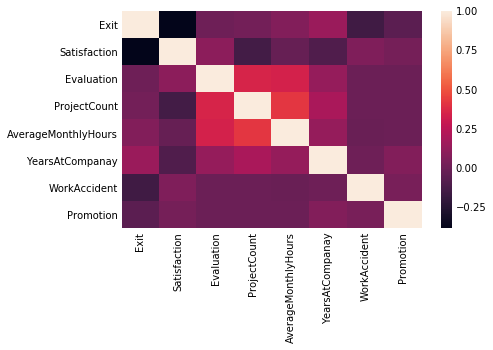

In [122]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
corr

# Salary Vs. Exit

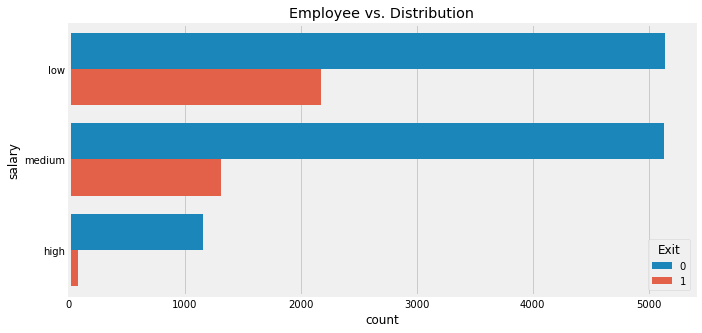

In [123]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(y = "salary", hue = 'Exit', data = df).set_title('Employee vs. Distribution');

# Department Vs. Exit

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

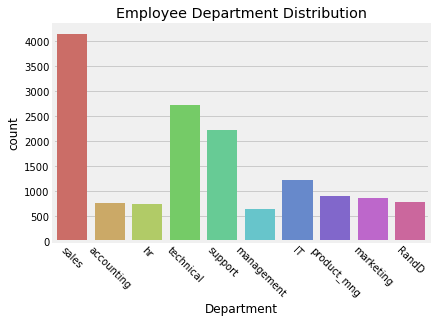

In [124]:
sns.countplot(x = 'Department', data = df, palette = "hls").set_title('Employee Department Distribution');

plt.xticks(rotation = -45)

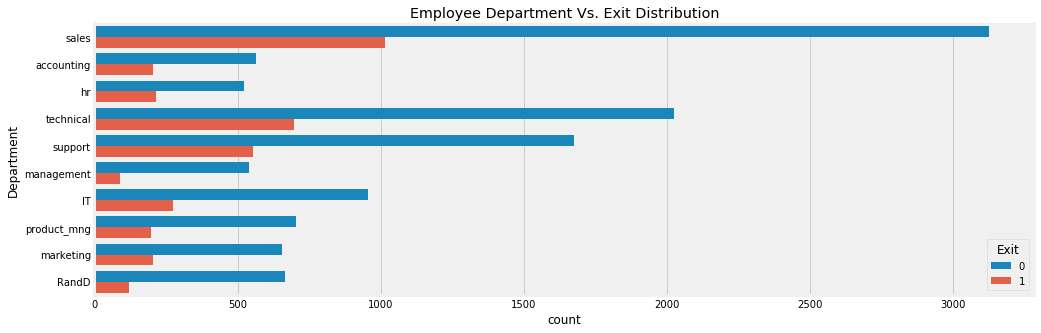

In [125]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y = "Department", hue = 'Exit', data = df).set_title('Employee Department Vs. Exit Distribution');

# ProjectCount Vs. Exit

Employees with 3, 4, and 5 projects stayed with the company as the projects assigned were of fair amount.

Where as with less projects such as only 2 and more projects as 6 and 7, employees tends to leave the company.

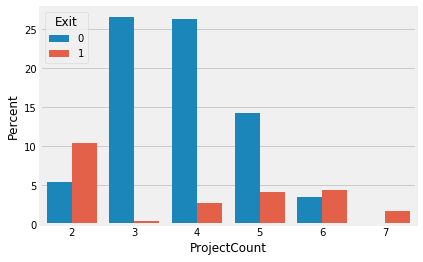

In [126]:
ax = sns.barplot(x = "ProjectCount", y = "ProjectCount", hue = "Exit", data = df, estimator = lambda x: len(x) / len(df) * 100)
ax.set(ylabel = "Percent")

# Evaluation Vs. Exit

We can see the bimodal distribution of the employee exits.

Those with very high and very low performances left the company.

The evaluation range within 0.6-0.8 is the best for employee to stay.

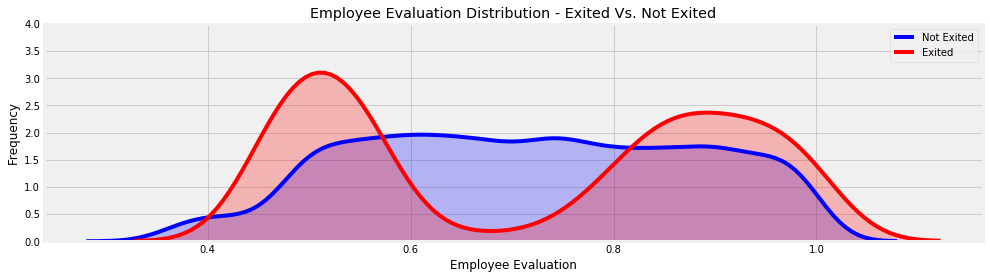

In [127]:
fig = plt.figure(figsize = (15,4),)
ax = sns.kdeplot(df.loc[(df['Exit'] == 0), 'Evaluation'], color = 'b', shade = True, label = 'Not Exited')
ax = sns.kdeplot(df.loc[(df['Exit'] == 1), 'Evaluation'], color = 'r', shade = True, label = 'Exited')
ax.set(xlabel = 'Employee Evaluation', ylabel = 'Frequency')
plt.ylim(0.0, 4.00)
plt.title('Employee Evaluation Distribution - Exited Vs. Not Exited')

# AverageMonthlyHours Vs. Exit

Here is another Bimodal distribution.

Employees with less than 150 hours and more than 250 hours often leaves the company.

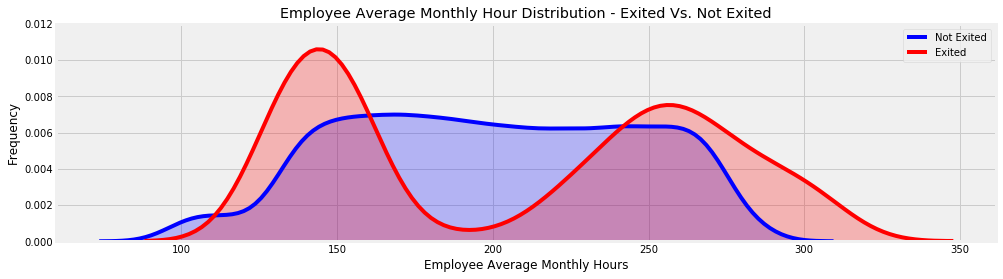

In [128]:
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Exit'] == 0), 'AverageMonthlyHours'], color = 'b', shade = True, label = 'Not Exited')
ax = sns.kdeplot(df.loc[(df['Exit'] == 1), 'AverageMonthlyHours'], color = 'r', shade = True, label = 'Exited')
ax.set(xlabel = 'Employee Average Monthly Hours', ylabel = 'Frequency')
plt.ylim(0.0, 0.012)
plt.title('Employee Average Monthly Hour Distribution - Exited Vs. Not Exited')

# Satisfaction Vs. Exit

Here it is trimodal distribution.

The employees with very low and very high satisfaction left, but also the employees whose satisfaction in 0.3-0.5 also left.

we can say that, those with satisfaction above average and less than highest stayed.

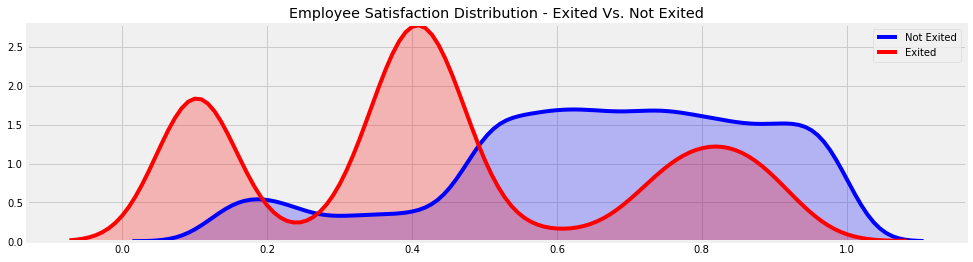

In [129]:
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Exit'] == 0), 'Satisfaction'], color = 'b', shade = True, label = 'Not Exited')
ax = sns.kdeplot(df.loc[(df['Exit'] == 1), 'Satisfaction'], color = 'r', shade = True, label = 'Exited')
plt.ylim(0.0, 2.8)
plt.title('Employee Satisfaction Distribution - Exited Vs. Not Exited')

# Feature Engineering

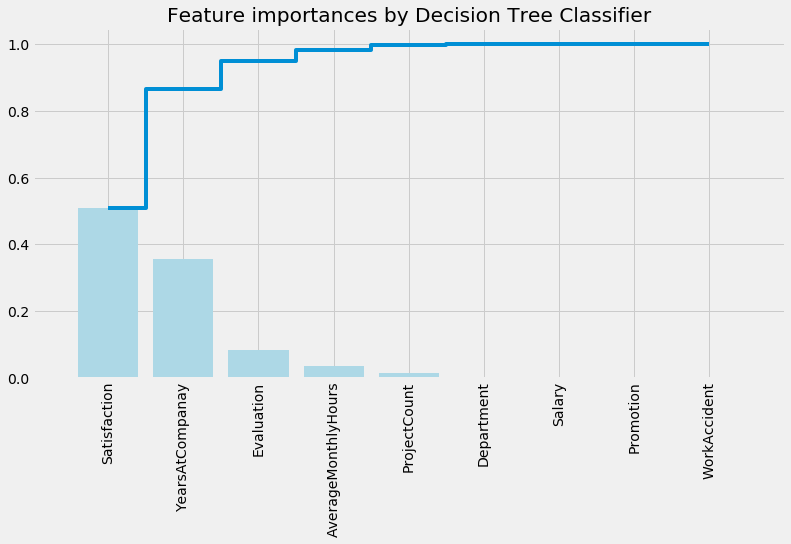

In [130]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renaming the data columns for easy understanding
df = df.rename(columns = {'satisfaction_level' :'Satisfaction',
                          'last_evaluation' : 'Evaluation',
                          'number_project' : 'ProjectCount',
                          'average_monthly_hours' : 'AverageMonthlyHours',
                          'time_spend_company' : 'YearsAtCompany',
                          'Work_accident' : 'WorkAccident',
                          'promotion_last_5years' : 'Promotion',
                          'sales' : 'Department',
                          'left' : 'Exit',
                          'salary' : 'Salary'
                         })

# Convert into Categorical Variables
df["Department"] = df["Department"].astype('category').cat.codes
df["Salary"] = df["Salary"].astype('category').cat.codes

# Create Train and Test Data set
target_name = 'Exit'
X = df.drop('Exit', axis = 1)

y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123, stratify = y)

# Plotting Importances using Decision Tree
decisiontree = tree.DecisionTreeClassifier(class_weight = "balanced", min_weight_fraction_leaf = 0.01)
decisiontree = decisiontree.fit(X_train, y_train)

                                 
importances = decisiontree.feature_importances_
featurename = df.drop(['Exit'], axis = 1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize = (12,6))
plt.title('Feature importances by Decision Tree Classifier')
plt.bar(range(len(indices)), importances[indices], color = 'lightblue', align = "center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where = 'mid', label = 'Cumulative')
plt.xticks(range(len(indices)), featurename[indices], rotation = 'vertical', fontsize = 14)
plt.xlim([-1, len(indices)])
plt.show()
                                 
                                 
                                 
                                 

# Modelling

# Logistic Regression Vs. Random Forest Vs. Decision Tree Vs. AdaBoost Model

In [131]:
X_train.head()

,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompanay,WorkAccident,Promotion,Department,Salary
9003,0.59,1.00,4,275,3,0,0,1,2
5697,0.81,0.98,6,196,2,0,0,8,1
10691,1.00,0.93,5,231,2,0,0,5,2
1884,0.87,0.91,5,228,5,0,0,8,1
13572,0.87,0.48,5,242,3,0,0,7,2


In [132]:
# Importing necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [133]:
# Create BaseRate Model
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [134]:
# Determining Base Rate Accuracy
y_base_rate = base_rate_model(X_test)
print("Base Rate Accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base Rate Accuracy is 0.76


In [135]:
# Determining Logistic Model Accuracy
model = LogisticRegression(penalty = 'l2', C = 1)
model.fit(X_train, y_train)
print("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.76


In [136]:
# Importing necessary Models
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [137]:
# Comparing Base Rate Model Vs. Logisitic model Vs. Decision Tree Model

#Printing Base Model Accuracy
print(" BASE MODEL")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Base Rate Accuracy = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))


# Logistic Model
# Adding "class_weight = balanced", the accuracy increases by 10%.
LModel = LogisticRegression(class_weight = "balanced")
LModel.fit(X_train, y_train)
print("LOGISTIC MODEL")
LModel_roc_auc = roc_auc_score(y_test, LModel.predict(X_test))
print("Logistic Accuracy = %2.2f" % LModel_roc_auc)
print(classification_report(y_test, LModel.predict(X_test)))


# Decision Tree Model
DTree = tree.DecisionTreeClassifier(
                                    class_weight = "balanced",
                                    min_weight_fraction_leaf = 0.01
                                    )
DTree = DTree.fit(X_train, y_train)
print("DECISION TREE MODEL")
DTree_roc_auc = roc_auc_score(y_test, DTree.predict(X_test))
print("Decision Tree Accuracy = %2.2f" % DTree_roc_auc)
print(classification_report(y_test, DTree.predict(X_test)))


 BASE MODEL
Base Rate Accuracy = 0.50
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      1714
          1       0.00      0.00      0.00       536

avg / total       0.58      0.76      0.66      2250

LOGISTIC MODEL
Logistic Accuracy = 0.76
             precision    recall  f1-score   support

          0       0.91      0.74      0.82      1714
          1       0.48      0.77      0.60       536

avg / total       0.81      0.75      0.77      2250

DECISION TREE MODEL
Decision Tree Accuracy = 0.94
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1714
          1       0.92      0.91      0.92       536

avg / total       0.96      0.96      0.96      2250



C:\Users\Jeet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [138]:
#Random Forest Model

RFC = RandomForestClassifier(
                            n_estimators = 1000,
                            max_depth = None,
                            min_samples_split = 10,
                            class_weight = "balanced"
                            )
RFC.fit(X_train, y_train)
print("RANDOM FOREST MODEL")
RFC_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))
print("Random Forest Accuracy = %2.2f" % RFC_roc_auc)
print(classification_report(y_test, RFC.predict(X_test)))


RANDOM FOREST MODEL
Random Forest Accuracy = 0.98
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1714
          1       0.99      0.96      0.98       536

avg / total       0.99      0.99      0.99      2250



In [139]:
# AdaBoost Model

ada = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.1)
ada.fit(X_train, y_train)
print("AdaBoost MODEL")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print("AdaBoost MOdel Accuracy = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))


AdaBoost MODEL
AdaBoost MOdel Accuracy = 0.92
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1714
          1       0.91      0.88      0.89       536

avg / total       0.95      0.95      0.95      2250



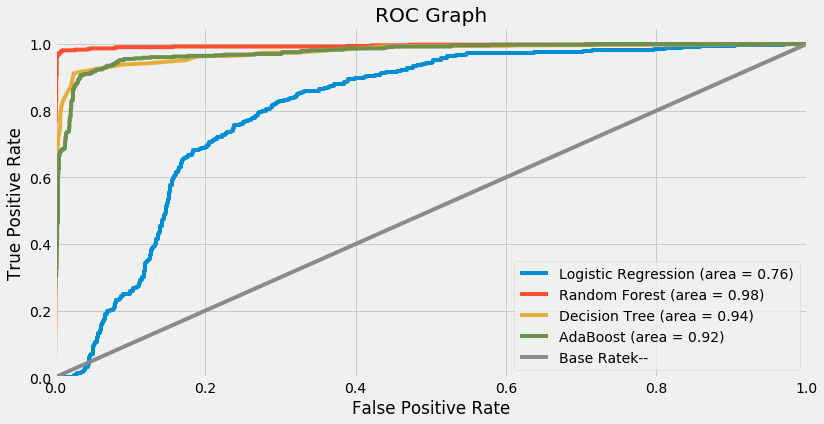

In [140]:
# ROC Graph

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, LModel.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, DTree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % LModel_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest (area = %0.2f)' % RFC_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label = 'Decision Tree (area = %0.2f)' % DTree_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label = 'AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc = "lower right")
plt.show()